In [1]:
from pils.loader.path import PathLoader
from pils.flight import Flight

# Set base path for filesystem-backed loader (adjust to your environment)
base_path = "/mnt/data/POLOCALC"
loader = PathLoader(base_path)

In [2]:
flights = loader.load_all_flights()

2026-01-30 13:47:58,720 - pils.loader.path - INFO - Loading all flights from all campaigns...
2026-01-30 13:47:58,721 - pils.loader.path - WARNING - Could not build flight dict for calibration  /mnt/data/POLOCALC/campaigns/202412/20241215/calibration : time data 'tion ' does not match format '%Y%m%d_%H%M'
2026-01-30 13:47:58,749 - pils.loader.path - WARNING - Could not build flight dict for Store-V2 /mnt/data/POLOCALC/campaigns/202412/.Spotlight-V100/Store-V2: time data '2' does not match format '%Y%m%d_%H%M'
2026-01-30 13:47:58,751 - pils.loader.path - WARNING - Could not build flight dict for 24_12_17 /mnt/data/POLOCALC/campaigns/202412/calibration_PUC/24_12_17: time data '7' does not match format '%Y%m%d_%H%M'
2026-01-30 13:47:58,751 - pils.loader.path - WARNING - Could not build flight dict for 24_12_18 /mnt/data/POLOCALC/campaigns/202412/calibration_PUC/24_12_18: time data '8' does not match format '%Y%m%d_%H%M'
2026-01-30 13:47:58,752 - pils.loader.path - WARNING - Could not buil

['202412', '202404', 'telescope_data', '202302', '202511', '202504', '202204']
###########
202412
202404
telescope_data
Skip Telescope Data
202302
202511
202504
202204


In [3]:
flights

[{'campaign_name': '202412',
  'flight_name': 'flight_20241215_1903',
  'flight_date': '20241215',
  'takeoff_datetime': '2024-12-15T19:03:00+00:00',
  'landing_datetime': '2024-12-15T19:03:00+00:00',
  'drone_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/drone',
  'aux_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/aux',
  'processed_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/proc'},
 {'campaign_name': '202412',
  'flight_name': 'flight_20241215_2055',
  'flight_date': '20241215',
  'takeoff_datetime': '2024-12-15T20:55:00+00:00',
  'landing_datetime': '2024-12-15T20:55:00+00:00',
  'drone_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_2055/drone',
  'aux_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_2055/aux',
  'processed_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20

# STOUT LOADER

In [1]:
from pils.loader.stout import StoutLoader
from pils.flight import Flight

# DB-backed loader (requires stout config and DB access)
stout_loader = StoutLoader()

flight_meta = stout_loader.load_single_flight(flight_id="e809e9fe-0dcb-4a70-8300-ac9dceb99d3f")

flight = Flight(flight_meta)

2026-01-30 14:45:46.710 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 14:45:46 - stout - WARNING - [authenticated_user] - Cannot write to log directory /mnt/data/POLOCALC/logs: [Errno 13] Permission denied: '/mnt/data/POLOCALC/logs/stout.log'. Using console logging only.
2026-01-30 14:45:46,390 - stout - WARNING - Cannot write to log directory /mnt/data/POLOCALC/logs: [Errno 13] Permission denied: '/mnt/data/POLOCALC/logs/stout.log'. Using console logging only.
2026-01-30 14:45:46.711 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 14:45:46 - stout - INFO - [authenticated_user] - Centralized logging system initialized
2026-01-30 14:45:46,712 - pils.loader.stout - INFO - Initialized with stout database, base path: /mnt/data/POLOC

In [3]:
flight.add_sensor_data(['gps', 'inclinometer'])

{'hAcc': 671, 'hMSL': 5147920, 'height': 5179382, 'iTOW': 141996000, 'lat': -22.95973, 'lon': -67.7869096, 'msgmode': 0, 'vAcc': 1200}
Sensor Type imx5


In [41]:
flight.raw_data['payload']['inclinometer']['IMU'].columns

['monotonic_ns',
 'timestamp_ns',
 'time_s',
 'status',
 'pqr_P_rad_s',
 'pqr_Q_rad_s',
 'pqr_R_rad_s',
 'acc_X_m_s2',
 'acc_Y_m_s2',
 'acc_Z_m_s2',
 'timestamp',
 'datetime',
 'pqr_P_deg_s',
 'pqr_Q_deg_s',
 'pqr_R_deg_s']

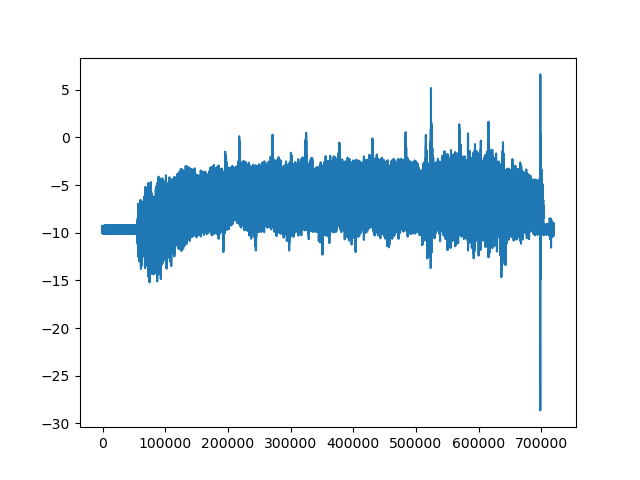

In [43]:
plt.figure()
plt.plot(flight.raw_data['payload']['inclinometer']['IMU']['acc_Z_m_s2'])

In [23]:
flight.add_drone_data()

2026-01-30 15:04:27,564 - pils.drones.DJIDrone - INFO - Tick unwrap at index 4009: 4,294,296,476 -> 206,394 (adding offset 2^32, total offset: 4,294,967,296)
2026-01-30 15:04:27,566 - pils.drones.DJIDrone - INFO - Loaded 7114 GPS messages from DAT file
2026-01-30 15:04:27,582 - pils.drones.DJIDrone - INFO - Tick unwrap at index 3705: 4,294,110,891 -> 43,735 (adding offset 2^32, total offset: 4,294,967,296)
2026-01-30 15:04:27,583 - pils.drones.DJIDrone - INFO - Loaded 6625 RTK messages from DAT file
2026-01-30 15:04:27,751 - pils.drones.DJIDrone - INFO - Converting timestamps to milliseconds


Drone:
shape: (13_608, 43)
┌────────────┬──────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ tick       ┆ msg_type ┆ GPS:date  ┆ GPS:time ┆ … ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:gps_s │
│ ---        ┆ ---      ┆ ---       ┆ ---      ┆   ┆ lg_3      ┆ lg_4      ┆ lg_5      ┆ tate      │
│ i64        ┆ i64      ┆ f64       ┆ f64      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│            ┆          ┆           ┆          ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 90722730   ┆ 53234    ┆ null      ┆ null     ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 91712457   ┆ 53234    ┆ null      ┆ null     ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 92612599   ┆ 53234    ┆ null      ┆ null     ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 93602073   ┆ 53234    ┆ null      ┆ null     ┆ … ┆ 0.0       ┆

In [29]:
import polars as pl
flight.raw_data.drone_data.litchi = flight.raw_data.drone_data.litchi.with_columns((pl.col("datetime").dt.timestamp("ms")).alias("unix_timestamp [ms]"))

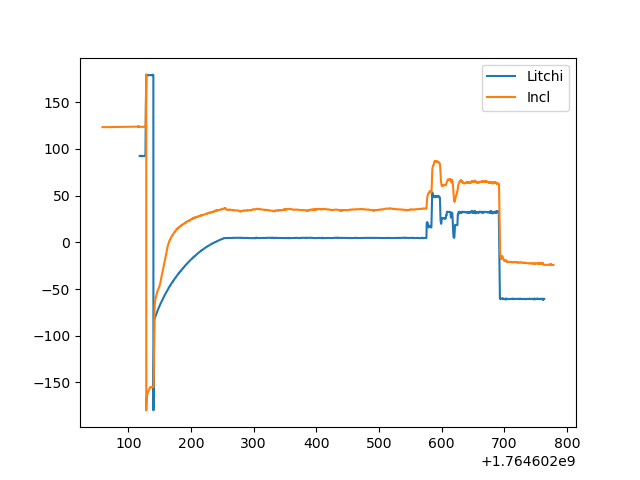

In [35]:
import numpy as np
plt.figure()

# plt.plot(flight.raw_data.drone_data.drone["correct_timestamp"], flight.raw_data.drone_data.drone["RTK:yaw"], label = 'DJI')
plt.plot(flight.raw_data.drone_data.litchi["unix_timestamp [ms]"]/1e3, flight.raw_data.drone_data.litchi["yaw(deg)"], label='Litchi')
plt.plot(flight.raw_data.payload_data['inclinometer']['INS']['timestamp_ns']/1e9, np.degrees(flight.raw_data.payload_data['inclinometer']['INS']['yaw_rad']), label='Incl')
plt.legend()
plt.show()

In [25]:
flight.raw_data.drone_data.litchi.columns

['latitude',
 'longitude',
 'altitude(m)',
 'speed(mps)',
 'distance(m)',
 'velocityX(mps)',
 'velocityY(mps)',
 'velocityZ(mps)',
 'pitch(deg)',
 'roll(deg)',
 'yaw(deg)',
 'isflying',
 'batteryTemperature',
 'pitchRaw',
 'rollRaw',
 'yawRaw',
 'gimbalPitchRaw',
 'gimbalRollRaw',
 'gimbalYawRaw',
 'datetime']

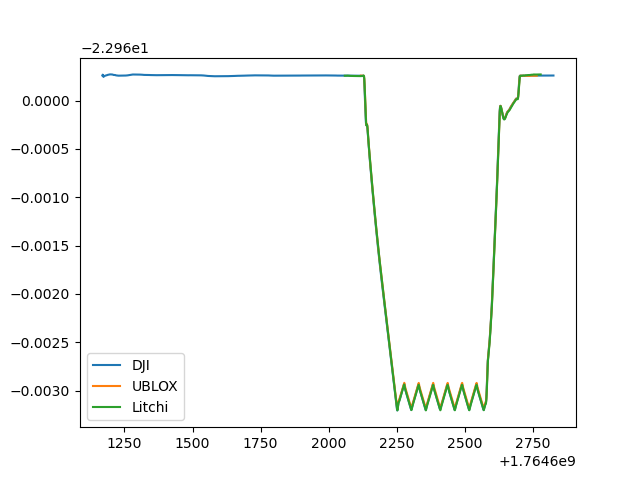

In [40]:
plt.figure()

plt.plot(flight.raw_data.drone_data.drone["correct_timestamp"], flight.raw_data.drone_data.drone["GPS:latitude"], label = 'DJI')
plt.plot(flight.raw_data.drone_data.litchi["unix_timestamp [ms]"]/1e3, flight.raw_data.drone_data.litchi["latitude"], label='UBLOX')
plt.plot(flight.raw_data.payload_data.gps['unix_time_ms']/1e3,flight.raw_data.payload_data.gps['posllh_lat'], label='Litchi')
plt.legend()
plt.show()

In [25]:
flight.raw_data.drone_data.litchi = flight.raw_data.drone_data.litchi.with_columns((pl.col("datetime").dt.timestamp("ms")).alias("unix_timestamp [ms]"))

In [24]:
import polars as pl
flight.raw_data.drone_data.litchi.with_columns((pl.col("datetime").dt.timestamp("ms")).alias("unix_timestamp [ms]"))

latitude,longitude,altitude(m),speed(mps),distance(m),velocityX(mps),velocityY(mps),velocityZ(mps),pitch(deg),roll(deg),yaw(deg),isflying,batteryTemperature,pitchRaw,rollRaw,yawRaw,gimbalPitchRaw,gimbalRollRaw,gimbalYawRaw,datetime,unix_timestamp [ms]
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,datetime[μs],i64
-22.959742,-67.786918,0.5,0.82,0.2,0.0,0.2,-0.8,1.8,0.7,92.5,1,2971.5,-18.0,7.0,925.0,0.0,0.0,7.0,2025-12-01 15:15:17.994,1764602117994
-22.959742,-67.786918,0.5,0.73,0.23,0.0,0.2,-0.7,2.1,0.6,92.5,1,2971.5,-21.0,6.0,925.0,1.0,0.0,7.0,2025-12-01 15:15:18.100,1764602118100
-22.959743,-67.786918,0.6,0.71,0.25,0.0,0.1,-0.7,2.1,0.5,92.5,1,2971.5,-21.0,5.0,925.0,2.0,0.0,7.0,2025-12-01 15:15:18.184,1764602118184
-22.959743,-67.786918,0.7,0.61,0.26,0.0,0.1,-0.6,2.1,0.4,92.4,1,2971.5,-21.0,4.0,924.0,0.0,0.0,7.0,2025-12-01 15:15:18.289,1764602118289
-22.959743,-67.786917,0.7,0.51,0.28,0.0,0.1,-0.5,1.9,0.3,92.4,1,2971.5,-19.0,3.0,924.0,0.0,0.0,7.0,2025-12-01 15:15:18.390,1764602118390
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-22.959743,-67.786918,0.0,0.0,0.19,0.0,0.0,0.0,0.0,-3.0,-60.8,0,3341.5,-0.0,-30.0,-608.0,-27.0,0.0,45.0,2025-12-01 15:26:03.160,1764602763160
-22.959743,-67.786918,0.0,0.0,0.19,0.0,0.0,0.0,0.0,-3.0,-60.8,0,3341.5,-0.0,-30.0,-608.0,-19.0,0.0,45.0,2025-12-01 15:26:03.264,1764602763264
-22.959743,-67.786918,0.0,0.0,0.2,0.0,0.0,0.0,0.1,-3.0,-60.7,0,3341.5,-1.0,-30.0,-607.0,-20.0,0.0,46.0,2025-12-01 15:26:03.364,1764602763364


In [38]:
def get_true_offset(t_ref, y_ref, t_target, y_target):
    # 1. Resample target to the reference clock
    f = interp1d(t_target, y_target, kind='linear', fill_value="extrapolate")
    y_target_res = f(t_ref)
    
    # 2. CALCULATE DERIVATIVES (The Magic Step)
    # This removes the global downward trend seen in your Figure 6
    dy_ref = np.diff(y_ref)
    dy_target = np.diff(y_target_res)
    
    # 3. Standardize the derivatives (Z-score)
    # This ensures different signal magnitudes don't bias the result
    dy_ref = (dy_ref - np.mean(dy_ref)) / np.std(dy_ref)
    dy_target = (dy_target - np.mean(dy_target)) / np.std(dy_target)
    
    # 4. Cross-Correlate the derivatives
    correlation = correlate(dy_ref, dy_target, mode='full')
    lags = correlation_lags(len(dy_ref), len(dy_target), mode='full')
    
    # 5. Find the peak
    best_lag_idx = lags[np.argmax(correlation)]
    dt = t_ref[1] - t_ref[0]
    
    return best_lag_idx * dt

tau2 = get_true_offset(flight.raw_data.payload_data.gps['unix_time_ms']/1e3, 
                   flight.raw_data.payload_data.gps['posllh_lat'], 
                   flight.raw_data.drone_data.drone["correct_timestamp"], 
                   flight.raw_data.drone_data.drone["GPS:latitude"])
tau3 = get_true_offset(flight.raw_data.payload_data.gps['unix_time_ms']/1e3, 
                   flight.raw_data.payload_data.gps['posllh_lat'], 
                   flight.raw_data.drone_data.litchi["unix_timestamp [ms]"]/1e3,
                   flight.raw_data.drone_data.litchi["latitude"])

print(f"Offset for Curve 2: {tau2:.3f}s")
print(f"Offset for Curve 3: {tau3:.3f}s")

Offset for Curve 2: 0.500s
Offset for Curve 3: 0.000s


GPS OFFSET FINDER
True time offset: 0.35 s
True spatial offset: [ 2.5 -1.8  0.5] m (ENU)

Reference point: lat=-22.959743°, lon=-67.786937°, alt=5181.11m

Sensor 1: 1439 samples, rate ~2.00 Hz
Sensor 2: 13608 samples, rate ~nan Hz
Common sampling interval: 0.5000 s (2.00 Hz)
Overlap duration: 719.00 s

Cross-correlation analysis:
East -axis: offset =  +0.5204 s, correlation = 1.73e+07
North-axis: offset =  +0.5655 s, correlation = 1.10e+08
Up   -axis: offset =  +1.0037 s, correlation = 9.78e+07
Weighted average time offset: +0.7525 s
  (Sensor 2 is ahead Sensor 1)

Spatial offset (Sensor1 - Sensor2):
  East:   +0.8281 m
  North:  -0.0668 m
  Up:    +30.9166 m
  Horizontal distance: 0.8308 m
  3D distance: 30.9277 m

ERROR ANALYSIS
Time offset error: 0.4025 s
Spatial offset error: 30.5117 m


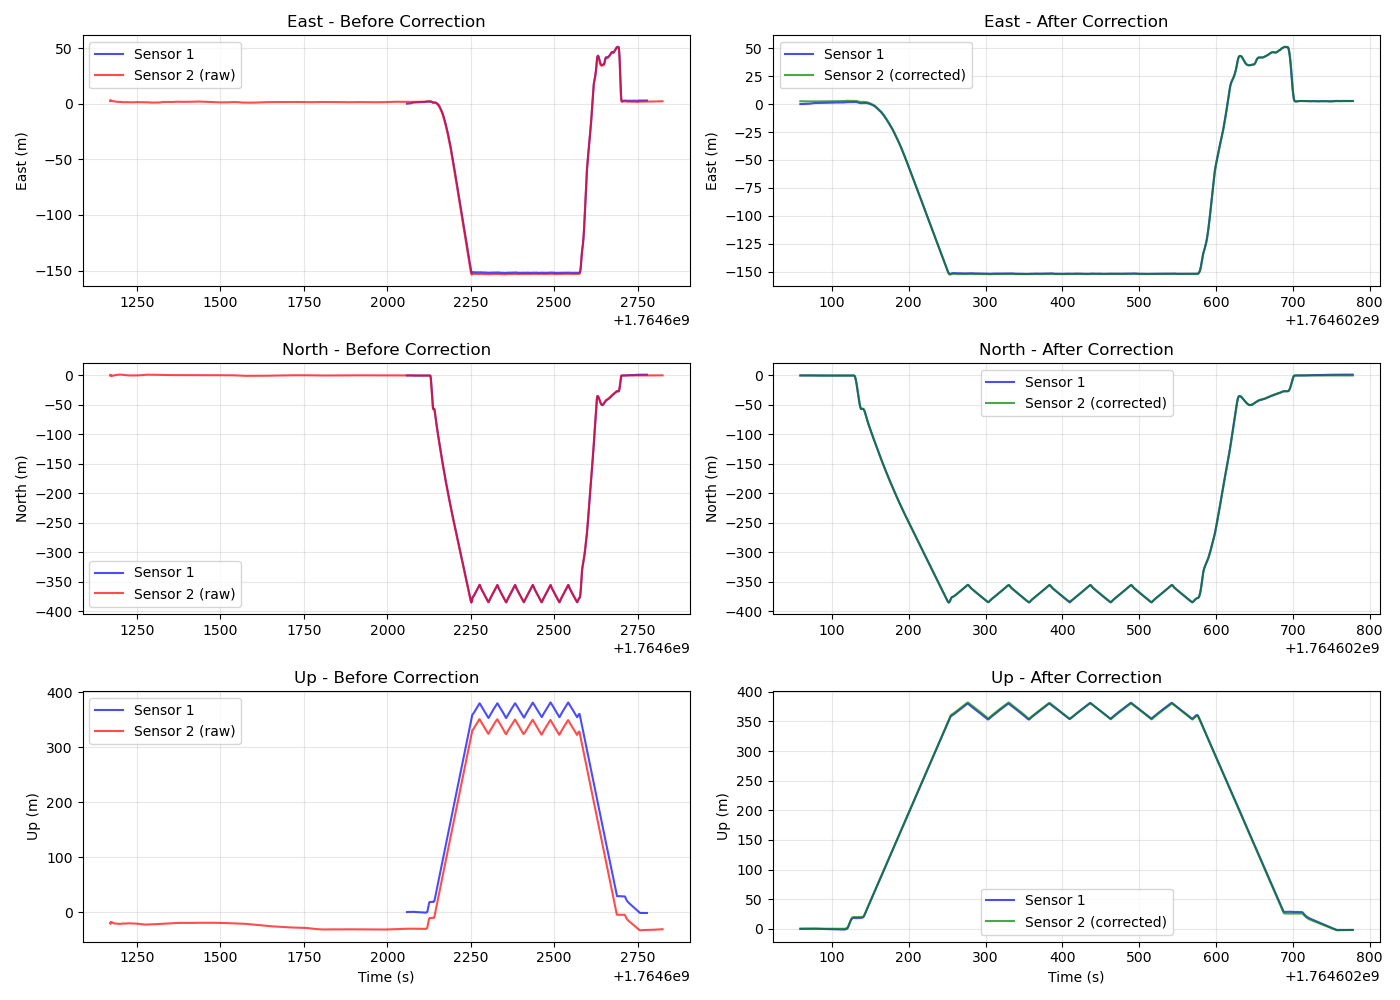

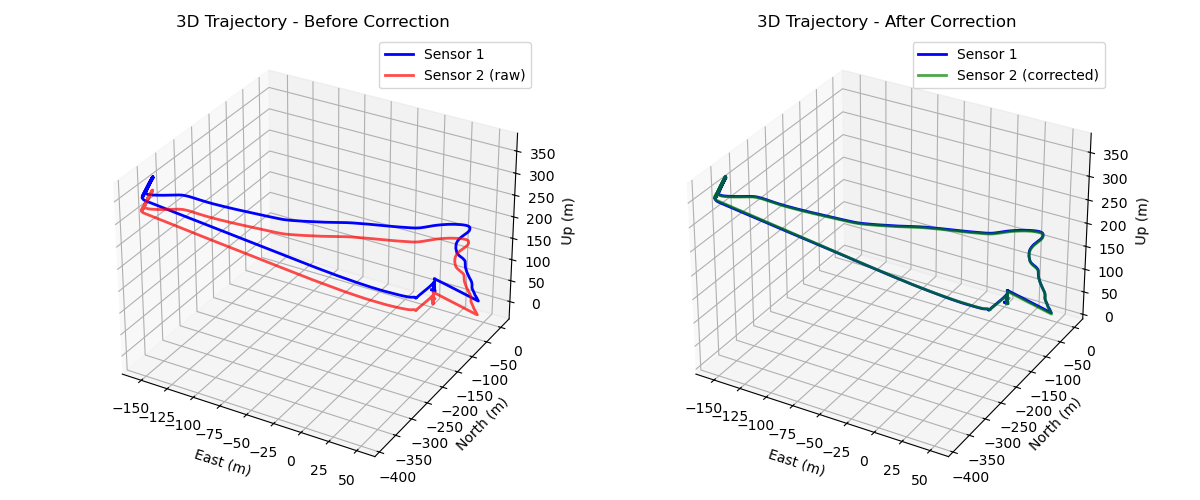

In [ ]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def lla_to_enu(lat, lon, alt, lat_ref, lon_ref, alt_ref):
    """
    Convert latitude, longitude, altitude to local ENU (East-North-Up) coordinates.
    
    Parameters:
    -----------
    lat, lon, alt : arrays of latitude (deg), longitude (deg), altitude (m)
    lat_ref, lon_ref, alt_ref : reference point for local frame
    
    Returns:
    --------
    east, north, up : arrays in meters
    """
    # Earth radius in meters
    R = 6378137.0
    
    # Convert to radians
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    lat_ref_rad = np.radians(lat_ref)
    lon_ref_rad = np.radians(lon_ref)
    
    # Compute ENU
    dlon = lon_rad - lon_ref_rad
    dlat = lat_rad - lat_ref_rad
    
    # Approximate for small distances
    east = R * dlon * np.cos(lat_ref_rad)
    north = R * dlat
    up = alt - alt_ref
    
    return east, north, up

def find_subsample_peak(correlation, lags, dt):
    """
    Find sub-sample peak using parabolic interpolation.
    
    Returns:
    --------
    Refined time offset with sub-sample precision
    """
    max_idx = np.argmax(correlation)
    
    # Need at least one sample on each side for interpolation
    if max_idx == 0 or max_idx == len(correlation) - 1:
        return lags[max_idx] * dt
    
    # Parabolic interpolation using three points around peak
    y1, y2, y3 = correlation[max_idx-1:max_idx+2]
    
    # Check for valid parabola (avoid division by zero)
    denominator = y1 - 2*y2 + y3
    if abs(denominator) < 1e-10:
        return lags[max_idx] * dt
    
    # Vertex of parabola through these three points
    delta = 0.5 * (y1 - y3) / denominator
    
    # Refined peak location
    refined_lag = lags[max_idx] + delta
    refined_offset = refined_lag * dt
    
    return refined_offset

def find_gps_offset(time1, lat1, lon1, alt1, time2, lat2, lon2, alt2, 
                    axis_names=['East', 'North', 'Up']):
    """
    Find time and spatial offset between two GPS sensors.
    
    Parameters:
    -----------
    time1, time2 : array-like, timestamps for each sensor (in seconds)
    lat1, lon1, alt1 : arrays for sensor 1 (latitude in deg, longitude in deg, altitude in m)
    lat2, lon2, alt2 : arrays for sensor 2
    axis_names : list of axis labels for reporting
    
    Returns:
    --------
    dict with 'time_offset' (in seconds) and 'spatial_offset' (3D vector in meters [E, N, U])
    """
    
    # Convert to numpy arrays
    time1 = np.array(time1)
    lat1 = np.array(lat1)
    lon1 = np.array(lon1)
    alt1 = np.array(alt1)
    
    time2 = np.array(time2)
    lat2 = np.array(lat2)
    lon2 = np.array(lon2)
    alt2 = np.array(alt2)
    
    # Choose reference point (use first point of sensor 1)
    lat_ref = lat1[0]
    lon_ref = lon1[0]
    alt_ref = alt1[0]
    
    print(f"Reference point: lat={lat_ref:.6f}°, lon={lon_ref:.6f}°, alt={alt_ref:.2f}m")
    
    # Convert both to ENU coordinates
    east1, north1, up1 = lla_to_enu(lat1, lon1, alt1, lat_ref, lon_ref, alt_ref)
    east2, north2, up2 = lla_to_enu(lat2, lon2, alt2, lat_ref, lon_ref, alt_ref)
    
    pos1 = np.column_stack([east1, north1, up1])
    pos2 = np.column_stack([east2, north2, up2])
    
    print(f"\nSensor 1: {len(time1)} samples, rate ~{1/np.median(np.diff(time1)):.2f} Hz")
    print(f"Sensor 2: {len(time2)} samples, rate ~{1/np.median(np.diff(time2)):.2f} Hz")
    
    # Determine common time base (use the higher frequency sensor's rate)
    dt1 = np.median(np.diff(time1))
    dt2 = np.median(np.diff(time2))
    dt_common = min(dt1, dt2)
    
    print(f"Common sampling interval: {dt_common:.4f} s ({1/dt_common:.2f} Hz)")
    
    # Create common time vector spanning the overlap
    t_start = max(time1[0], time2[0])
    t_end = min(time1[-1], time2[-1])
    time_common = np.arange(t_start, t_end, dt_common)
    
    print(f"Overlap duration: {t_end - t_start:.2f} s")
    
    # Interpolate both signals to common timebase
    pos1_interp = np.zeros((len(time_common), 3))
    pos2_interp = np.zeros((len(time_common), 3))
    
    for i in range(3):
        f1 = interp1d(time1, pos1[:, i], kind='linear', bounds_error=False, fill_value='extrapolate')
        f2 = interp1d(time2, pos2[:, i], kind='linear', bounds_error=False, fill_value='extrapolate')
        pos1_interp[:, i] = f1(time_common)
        pos2_interp[:, i] = f2(time_common)
    
    # Compute cross-correlation for each axis
    time_offsets = []
    correlations = []
    
    print("\n" + "="*60)
    print("Cross-correlation analysis:")
    print("="*60)
    
    for i, axis_name in enumerate(axis_names):
        corr = signal.correlate(pos1_interp[:, i], pos2_interp[:, i], mode='full')
        lags = signal.correlation_lags(len(pos1_interp[:, i]), len(pos2_interp[:, i]), mode='full')
        
        # Find peak with sub-sample precision
        time_offset_seconds = find_subsample_peak(corr, lags, dt_common)
        
        time_offsets.append(time_offset_seconds)
        correlations.append(np.max(corr))
        
        print(f"{axis_name:5s}-axis: offset = {time_offset_seconds:+8.4f} s, correlation = {np.max(corr):.2e}")
    
    # Use weighted average of time offsets (weighted by correlation strength)
    correlations = np.array(correlations)
    time_offsets = np.array(time_offsets)
    weights = correlations / np.sum(correlations)
    final_time_offset = np.sum(time_offsets * weights)
    
    print("="*60)
    print(f"Weighted average time offset: {final_time_offset:+.4f} s")
    print(f"  (Sensor 2 is {'ahead' if final_time_offset > 0 else 'behind'} Sensor 1)")
    print("="*60)
    
    # Now time-align and compute spatial offset
    # Shift sensor 2 by the detected offset
    time2_aligned = time2 + final_time_offset
    
    # Re-interpolate to find spatial offset
    pos2_aligned = np.zeros((len(time1), 3))
    for i in range(3):
        f2 = interp1d(time2_aligned, pos2[:, i], kind='linear', 
                     bounds_error=False, fill_value='extrapolate')
        pos2_aligned[:, i] = f2(time1)
    
    # Compute spatial offset (mean difference)
    spatial_offset = np.mean(pos1 - pos2_aligned, axis=0)
    
    print(f"\nSpatial offset (Sensor1 - Sensor2):")
    print(f"  East:  {spatial_offset[0]:+8.4f} m")
    print(f"  North: {spatial_offset[1]:+8.4f} m")
    print(f"  Up:    {spatial_offset[2]:+8.4f} m")
    print(f"  Horizontal distance: {np.sqrt(spatial_offset[0]**2 + spatial_offset[1]**2):.4f} m")
    print(f"  3D distance: {np.linalg.norm(spatial_offset):.4f} m")
    
    return {
        'time_offset': final_time_offset,
        'time_offsets_per_axis': time_offsets,
        'correlations': correlations,
        'spatial_offset': spatial_offset,
        'spatial_offset_enu': {'east': spatial_offset[0], 
                               'north': spatial_offset[1], 
                               'up': spatial_offset[2]},
        'dt_common': dt_common,
        'pos1_enu': pos1,
        'pos2_enu': pos2,
        'time1': time1,
        'time2': time2
    }

def plot_alignment(result):
    """
    Visualize the GPS alignment results.
    
    Parameters:
    -----------
    result : dict returned from find_gps_offset
    """
    pos1 = result['pos1_enu']
    pos2 = result['pos2_enu']
    time1 = result['time1']
    time2 = result['time2']
    time_offset = result['time_offset']
    spatial_offset = result['spatial_offset']
    
    # Apply corrections to sensor 2
    time2_corrected = time2 + time_offset
    pos2_corrected = pos2 + spatial_offset
    
    # Interpolate sensor 2 to sensor 1 timestamps for comparison
    pos2_interp = np.zeros_like(pos1)
    for i in range(3):
        f = interp1d(time2_corrected, pos2_corrected[:, i], kind='linear',
                    bounds_error=False, fill_value='extrapolate')
        pos2_interp[:, i] = f(time1)
    
    fig, axes = plt.subplots(3, 2, figsize=(14, 10))
    axis_names = ['East', 'North', 'Up']
    
    for i, name in enumerate(axis_names):
        # Before correction
        axes[i, 0].plot(time1, pos1[:, i], 'b-', label='Sensor 1', alpha=0.7)
        axes[i, 0].plot(time2, pos2[:, i], 'r-', label='Sensor 2 (raw)', alpha=0.7)
        axes[i, 0].set_ylabel(f'{name} (m)')
        axes[i, 0].legend()
        axes[i, 0].grid(True, alpha=0.3)
        axes[i, 0].set_title(f'{name} - Before Correction')
        
        # After correction
        axes[i, 1].plot(time1, pos1[:, i], 'b-', label='Sensor 1', alpha=0.7)
        axes[i, 1].plot(time1, pos2_interp[:, i], 'g-', label='Sensor 2 (corrected)', alpha=0.7)
        axes[i, 1].set_ylabel(f'{name} (m)')
        axes[i, 1].legend()
        axes[i, 1].grid(True, alpha=0.3)
        axes[i, 1].set_title(f'{name} - After Correction')
    
    axes[2, 0].set_xlabel('Time (s)')
    axes[2, 1].set_xlabel('Time (s)')
    
    plt.tight_layout()
    plt.show()
    
    # 3D trajectory plot
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot(pos1[:, 0], pos1[:, 1], pos1[:, 2], 'b-', label='Sensor 1', linewidth=2)
    ax1.plot(pos2[:, 0], pos2[:, 1], pos2[:, 2], 'r-', label='Sensor 2 (raw)', linewidth=2, alpha=0.7)
    ax1.set_xlabel('East (m)')
    ax1.set_ylabel('North (m)')
    ax1.set_zlabel('Up (m)')
    ax1.legend()
    ax1.set_title('3D Trajectory - Before Correction')
    
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot(pos1[:, 0], pos1[:, 1], pos1[:, 2], 'b-', label='Sensor 1', linewidth=2)
    ax2.plot(pos2_corrected[:, 0], pos2_corrected[:, 1], pos2_corrected[:, 2], 
             'g-', label='Sensor 2 (corrected)', linewidth=2, alpha=0.7)
    ax2.set_xlabel('East (m)')
    ax2.set_ylabel('North (m)')
    ax2.set_zlabel('Up (m)')
    ax2.legend()
    ax2.set_title('3D Trajectory - After Correction')
    
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Example with synthetic data - replace with your real data
    
    print("="*60)
    print("GPS OFFSET FINDER")
    print("="*60)
    print(f"True time offset: {time_offset_true} s")
    print(f"True spatial offset: {spatial_offset_true} m (ENU)")
    print()
    
    # Find the offset
    result = find_gps_offset(flight.raw_data.payload_data.gps['unix_time_ms']/1e3, 
                             flight.raw_data.payload_data.gps['posllh_lat'], 
                             flight.raw_data.payload_data.gps['posllh_lon'], 
                             flight.raw_data.payload_data.gps['posllh_height']/1e3, 
                             flight.raw_data.drone_data.drone["correct_timestamp"], 
                             flight.raw_data.drone_data.drone["GPS:latitude"], 
                             flight.raw_data.drone_data.drone["GPS:longitude"], 
                             flight.raw_data.drone_data.drone["GPS:heightMSL"])
    
    print("\n" + "="*60)
    print("ERROR ANALYSIS")
    print("="*60)
    print(f"Time offset error: {abs(result['time_offset'] - time_offset_true):.4f} s")
    print(f"Spatial offset error: {np.linalg.norm(result['spatial_offset'] - spatial_offset_true):.4f} m")
    
    # Plot results
    plot_alignment(result)

In [43]:
flight.raw_data.payload_data.gps['posllh_height']

posllh_height
i64
5181113
5181147
5181187
5181225
5181265
…
5179384
5179380
5179381


In [45]:
flight.raw_data.payload_data.gps

unix_time_ms,posecef_ecefX,posecef_ecefY,posecef_ecefZ,posecef_msgmode,posecef_pAcc,datetime_relative,posllh_hAcc,posllh_hMSL,posllh_height,posllh_lat,posllh_lon,posllh_msgmode,posllh_vAcc,clock_clkB,clock_clkD,clock_fAcc,clock_msgmode,clock_tAcc,datetime,timestamp
i64,i64,i64,i64,i64,i64,datetime[μs],i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,datetime[ms],f64
1764602059000,222317927,-544418616,-247463601,0,654,2025-12-01 15:14:18.223,3616,5149651,5181113,-22.959743,-67.786937,0,5451,596168,250,422,0,11,2025-12-01 15:14:19,1.7646e9
1764602059500,222317931,-544418617,-247463603,0,626,2025-12-01 15:14:18.723,3438,5149685,5181147,-22.959743,-67.786937,0,5227,596293,250,389,0,11,2025-12-01 15:14:19.500,1.7646e9
1764602060000,222317934,-544418620,-247463605,0,601,2025-12-01 15:14:19.223,3286,5149725,5181187,-22.959743,-67.786937,0,5032,596419,251,378,0,10,2025-12-01 15:14:20,1.7646e9
1764602060500,222317937,-544418622,-247463607,0,579,2025-12-01 15:14:19.723,3150,5149763,5181225,-22.959743,-67.786937,0,4856,596544,250,399,0,10,2025-12-01 15:14:20.500,1.7646e9
1764602061000,222317940,-544418625,-247463609,0,559,2025-12-01 15:14:20.223,3031,5149802,5181265,-22.959743,-67.786936,0,4697,596669,250,412,0,10,2025-12-01 15:14:21,1.7646e9
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1764602776000,222318151,-544418414,-247463399,0,137,2025-12-01 15:26:15.223,670,5147922,5179384,-22.95973,-67.78691,0,1200,743753,219,295,0,3,2025-12-01 15:26:16,1.7646e9
1764602776500,222318151,-544418414,-247463399,0,137,2025-12-01 15:26:15.723,671,5147918,5179380,-22.95973,-67.78691,0,1200,743863,219,288,0,3,2025-12-01 15:26:16.500,1.7646e9
1764602777000,222318151,-544418414,-247463398,0,137,2025-12-01 15:26:16.223,671,5147919,5179381,-22.95973,-67.78691,0,1200,743973,220,284,0,3,2025-12-01 15:26:17,1.7646e9


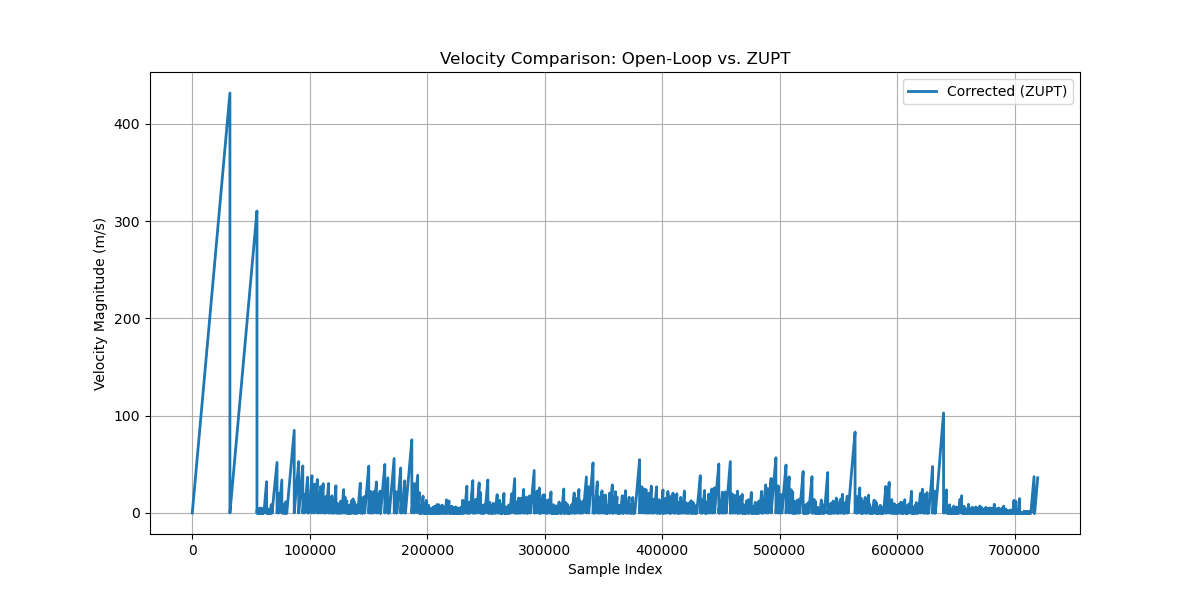

In [52]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

def compare_velocity_methods(imu_df: pl.DataFrame, ins2_df: pl.DataFrame):
    # Alignment and DT calculation
    df = imu_df.join_asof(ins2_df, on="timestamp_ns").interpolate()
    df = df.with_columns([
        ((pl.col("timestamp_ns") - pl.col("timestamp_ns").shift(1)) / 1e9).fill_null(0).alias("dt")
    ])

    acc_raw = df.select(['acc_X_m_s2', 'acc_Y_m_s2', 'acc_Z_m_s2']).to_numpy()
    gyr_raw = df.select(['pqr_P_rad_s', 'pqr_Q_rad_s', 'pqr_R_rad_s']).to_numpy()
    # Using INS2 internal quats for the "Corrected" version
    quats = df.select(['qe2b_x', 'qe2b_y', 'qe2b_z', 'qe2b_w']).to_numpy()
    dts = df['dt'].to_numpy()

    N = len(df)
    g_mag = 9.80665
    g_vec = np.array([0, 0, -g_mag])

    # --- Method 1: Your Provided Code (Open Loop) ---
    vel_open = np.zeros((N, 3))
    curr_rot = R.from_quat([0,0,0,1])
    for i in range(1, N):
        # Orientation update
        delta_rot = R.from_rotvec(gyr_raw[i-1] * dts[i])
        curr_rot = curr_rot * delta_rot
        # Accel transform and integration
        acc_world = curr_rot.apply(acc_raw[i]) - g_vec
        vel_open[i] = vel_open[i-1] + acc_world * dts[i]

    # --- Method 2: ZUPT Corrected ---
    vel_zupt = np.zeros((N, 3))
    for i in range(1, N):
        # Use IMX5 internal orientation (much more stable)
        r = R.from_quat(quats[i])
        acc_world = r.apply(acc_raw[i]) - g_vec
        vel_zupt[i] = vel_zupt[i-1] + acc_world * dts[i]
        
        # ZUPT Trigger (The magic part)
        if np.linalg.norm(gyr_raw[i]) < 0.02 and abs(np.linalg.norm(acc_raw[i]) - g_mag) < 0.1:
            vel_zupt[i] = 0

    # --- Plotting the Comparison ---
    plt.figure(figsize=(12, 6))
    # plt.plot(np.linalg.norm(vel_open, axis=1), label='Your Code (Open Loop)', alpha=0.7)
    plt.plot(np.linalg.norm(vel_zupt, axis=1), label='Corrected (ZUPT)', linewidth=2)
    plt.title("Velocity Comparison: Open-Loop vs. ZUPT")
    plt.ylabel("Velocity Magnitude (m/s)")
    plt.xlabel("Sample Index")
    plt.legend()
    plt.grid(True)
    plt.show()

compare_velocity_methods(flight.raw_data.payload_data['inclinometer']['IMU'], flight.raw_data.payload_data['inclinometer']['INL2'])

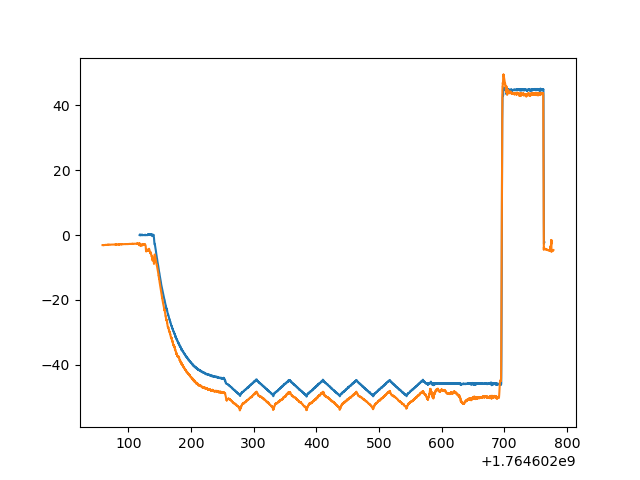

In [68]:
plt.figure()
plt.plot(flight.raw_data.drone_data.litchi["unix_timestamp [ms]"]/1e3, flight.raw_data.drone_data.litchi['gimbalPitchRaw']/10)
plt.plot(flight.raw_data.payload_data['inclinometer']['INS']["timestamp_ns"]/1e9, flight.raw_data.payload_data['inclinometer']['INS']["pitch"])

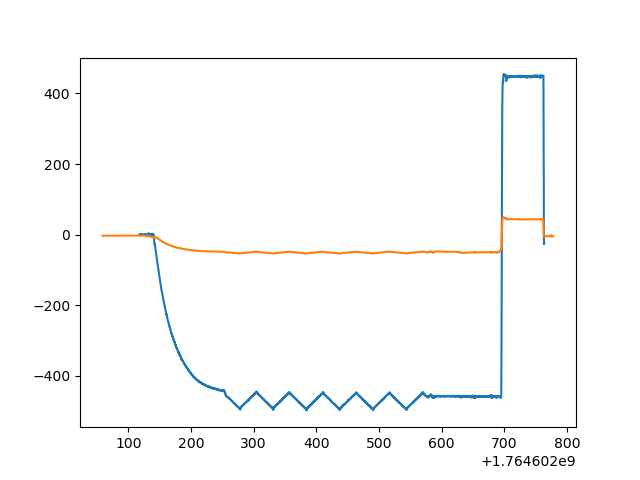

In [67]:
plt.figure()
plt.plot(flight.raw_data.drone_data.litchi["unix_timestamp [ms]"]/1e3, flight.raw_data.drone_data.litchi['gimbalPitchRaw'])
plt.plot(flight.raw_data.payload_data['inclinometer']['INS']["timestamp_ns"]/1e9, flight.raw_data.payload_data['inclinometer']['INS']["pitch"])

In [64]:
flight.raw_data.payload_data['inclinometer']['INS']

monotonic_ns,timestamp_ns,lat_deg,lon_deg,week,timeOfWeek_s,insStatus,hdwStatus,alt_m,roll_rad,pitch_rad,yaw_rad,vel_U_m_s,vel_V_m_s,vel_W_m_s,ned_N_m,ned_E_m,ned_D_m,roll,pitch,yaw,timestamp,datetime
i64,i64,f64,f64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[ns]
6536113,1764602058764067785,0.0,0.0,1,38.496378,329745,33554435,0.0,0.064313,-0.053752,2.154261,0.0,0.0,0.0,0.0,0.0,-0.0,3.684863,-3.079763,123.430063,1.7646e9,2025-12-01 15:14:18.764067785
13537927,1764602058771069506,0.0,0.0,1,38.503378,329745,33554435,0.0,0.06438,-0.053691,2.154206,0.0,0.0,0.0,0.0,0.0,-0.0,3.688702,-3.076268,123.426912,1.7646e9,2025-12-01 15:14:18.771069506
20479389,1764602058778011060,0.0,0.0,1,38.510378,329745,33554435,0.0,0.064358,-0.053729,2.154233,0.0,0.0,0.0,0.0,0.0,-0.0,3.687442,-3.078445,123.428459,1.7646e9,2025-12-01 15:14:18.778011060
27512146,1764602058785043799,0.0,0.0,1,38.517378,329745,33554435,0.0,0.064313,-0.053719,2.154233,0.0,0.0,0.0,0.0,0.0,-0.0,3.684863,-3.077872,123.428459,1.7646e9,2025-12-01 15:14:18.785043799
34458941,1764602058791990613,0.0,0.0,1,38.524378,329745,33554435,0.0,0.064423,-0.053715,2.154258,0.0,0.0,0.0,0.0,0.0,-0.0,3.691166,-3.077643,123.429891,1.7646e9,2025-12-01 15:14:18.791990613
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
719495309177,1764602778252840849,0.0,0.0,1,757.984379,329745,33554435,0.0,0.051995,-0.081296,-0.423272,0.0,0.0,0.0,0.0,0.0,-0.0,2.979094,-4.657918,-24.251699,1.7646e9,2025-12-01 15:26:18.252840849
719502378508,1764602778259910161,0.0,0.0,1,757.991379,329745,33554435,0.0,0.05181,-0.081138,-0.4233,0.0,0.0,0.0,0.0,0.0,-0.0,2.968494,-4.648865,-24.253303,1.7646e9,2025-12-01 15:26:18.259910161
719509362896,1764602778266894567,0.0,0.0,1,757.998379,329745,33554435,0.0,0.05205,-0.081042,-0.423314,0.0,0.0,0.0,0.0,0.0,-0.0,2.982245,-4.643365,-24.254106,1.7646e9,2025-12-01 15:26:18.266894567
